<a href="https://colab.research.google.com/github/NREL/BEEAM/blob/flexlab-develop/FMU/flexlab_demo/openstudio/notebooks/weather_data_EPW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose

Notebook for creating and EnergyPlus weather file (.epw) in CSV format from measured data. The resulting EPW file must be converted to a valid EPW file using the EnergyPlus Weather Converter program.
https://bigladdersoftware.com/epx/docs/9-4/auxiliary-programs/energyplus-weather-file-epw-data-dictionary.html

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import libraries
import csv
import numpy as np
import os
import pandas as pd

# 1 Setup

In [ ]:
# dir and path of an EPW file to use for the header data
hdr_dir = r'/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/NREL OpenStudio Model/1 Weather'
epw_path = os.path.join(hdr_dir, 'USA_CA_Oakland.Intl.AP.724930_TMY3.epw')
print(epw_path)

# dir and path of a CSV file of measured data
csv_dir = r'/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data'
csv_path = os.path.join(csv_dir, 'weather_data_combined.csv')
print(csv_path)

# # NOTE: project-specific 2nd CSV file
# csv_path2 = os.path.join(csv_dir + '/Raw', 'wind_pressure_RH for FLEXLAB test.csv')
# print(csv_path2)

# energyplus timestep
timesteps_per_hour = 1
timestep_minutes = 60 // timesteps_per_hour

# pandas resample data
resample = True
resample_rule = str(timestep_minutes) + 'T'
print(resample_rule)

# final EPW file name
epw_prefix = 'epw_'

# # beginning and end times for shifting data
# shift = True
# if shift == True:
#     beg_time = '2020-01-01 00:00'
#     end_time = '2020-10-27 23:59'
#     index = pd.date_range(start=beg_time, end=end_time, freq=str(timestep_minutes) + 'min')

/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/NREL OpenStudio Model/1 Weather/USA_CA_Oakland.Intl.AP.724930_TMY3.epw
/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data/weather_data_combined.csv
60T


In [ ]:
# EPW location
LOCATION = {}
LOCATION['city'] = 'Berkeley (LBNL FLEXLAB)'
LOCATION['state'] = 'CA'
LOCATION['country'] = 'USA'
LOCATION['source'] = 'LBNL FLEXLAB'
LOCATION['wmo'] = ''
LOCATION['lat'] = 37.879 #06804679811
LOCATION['lon'] = -122.253 #8901056381
LOCATION['timezone'] = -8
LOCATION['elevation'] = 207.264 # 680 ft

# EPW rows to copy
DESIGN_CONDITIONS = []
TYPICAL_EXTREME_CONDITIONS = []
GROUND_TEMPERATURES = []
HOLIDAYS_DAYLIGHT_SAVINGS = []
COMMENTS_1 = []
COMMENTS_2 = []

with open(epw_path, 'r', newline='') as f:

    csv_reader = csv.reader(f)
    csv_list = list(csv_reader)

    DESIGN_CONDITIONS = csv_list[1][1:]
    TYPICAL_EXTREME_CONDITIONS = csv_list[2][1:]
    GROUND_TEMPERATURES = csv_list[3][1:]
    HOLIDAYS_DAYLIGHT_SAVINGS = csv_list[4][1:]
    HOLIDAYS_DAYLIGHT_SAVINGS[0] = 'Yes' # leap year 
    COMMENTS_1 = [None]
    COMMENTS_2 = csv_list[6][1:]

# EPW data periods
DATA_PERIODS = {}
DATA_PERIODS['number'] = 1
DATA_PERIODS['records_per_hour'] = timesteps_per_hour
DATA_PERIODS['name'] = 'Period 1'
DATA_PERIODS['start_day'] = 'Wednesday'
DATA_PERIODS['start_date'] = '1/1'
DATA_PERIODS['end_date'] = '11/30'

# EPW header dict
EPW_HEADER = {}
EPW_HEADER['LOCATION'] = LOCATION
EPW_HEADER['DESIGN CONDITIONS'] = DESIGN_CONDITIONS
EPW_HEADER['TYPICAL/EXTREME PERIODS'] = TYPICAL_EXTREME_CONDITIONS
EPW_HEADER['GROUND TEMPERATURES'] = GROUND_TEMPERATURES
EPW_HEADER['HOLIDAYS/DAYLIGHT SAVINGS'] = HOLIDAYS_DAYLIGHT_SAVINGS
EPW_HEADER['COMMENTS 1'] = COMMENTS_1
EPW_HEADER['COMMENTS 2'] = COMMENTS_2
EPW_HEADER['DATA PERIODS'] = DATA_PERIODS

for key1, val1 in EPW_HEADER.items():
    print(key1)
    if isinstance(val1, dict):
        print('dict', val1)
    if isinstance(val1, list):
        print('list', val1)

LOCATION
dict {'city': 'Berkeley (LBNL FLEXLAB)', 'state': 'CA', 'country': 'USA', 'source': 'LBNL FLEXLAB', 'wmo': '', 'lat': 37.879, 'lon': -122.253, 'timezone': -8, 'elevation': 207.264}
DESIGN CONDITIONS
list ['1', 'Climate Design Data 2009 ASHRAE Handbook', '', 'Heating', '1', '2.9', '4.2', '-6', '2.3', '10.7', '-2.5', '3.1', '10.7', '11.4', '11.9', '10.1', '12.1', '2.2', '50', 'Cooling', '8', '7.4', '27.7', '18.3', '25.4', '17.8', '23.5', '17.3', '19.8', '25.5', '18.8', '24', '18', '22.5', '4.9', '290', '17.6', '12.7', '21.6', '16.8', '12', '20.7', '16.2', '11.5', '19.9', '56.5', '25.4', '53.3', '23.8', '50.8', '22.4', '2102', 'Extremes', '10.3', '8.7', '8.1', '25.6', '0.8', '33.2', '1.8', '2.2', '-0.4', '34.8', '-1.5', '36.1', '-2.5', '37.4', '-3.8', '39']
TYPICAL/EXTREME PERIODS
list ['6', 'Summer - Week Nearest Max Temperature For Period', 'Extreme', '8/ 5', '8/11', 'Summer - Week Nearest Average Temperature For Period', 'Typical', '9/ 2', '9/ 8', 'Winter - Week Nearest Min Te

In [ ]:
# write header data to csv file
epw_header_path = os.path.join(hdr_dir, 'epw_header.csv')
print(epw_header_path)

with open(epw_header_path, 'w', newline='') as f:
    
    csv_writer = csv.writer(f)

    for key, val in EPW_HEADER.items():
    
        if isinstance(val, dict):
            row = [key] + list(val.values())
        if isinstance(val, list):
            row = [key] + val
        print(row)
        csv_writer.writerow(row)


/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/NREL OpenStudio Model/1 Weather/epw_header.csv
['LOCATION', 'Berkeley (LBNL FLEXLAB)', 'CA', 'USA', 'LBNL FLEXLAB', '', 37.879, -122.253, -8, 207.264]
['DESIGN CONDITIONS', '1', 'Climate Design Data 2009 ASHRAE Handbook', '', 'Heating', '1', '2.9', '4.2', '-6', '2.3', '10.7', '-2.5', '3.1', '10.7', '11.4', '11.9', '10.1', '12.1', '2.2', '50', 'Cooling', '8', '7.4', '27.7', '18.3', '25.4', '17.8', '23.5', '17.3', '19.8', '25.5', '18.8', '24', '18', '22.5', '4.9', '290', '17.6', '12.7', '21.6', '16.8', '12', '20.7', '16.2', '11.5', '19.9', '56.5', '25.4', '53.3', '23.8', '50.8', '22.4', '2102', 'Extremes', '10.3', '8.7', '8.1', '25.6', '0.8', '33.2', '1.8', '2.2', '-0.4', '34.8', '-1.5', '36.1', '-2.5', '37.4', '-3.8', '39']
['TYPICAL/EXTREME PERIODS', '6', 'Summer - Week Nearest Max Temperature For Period', 'Extreme', '8/ 5', '8/11', 'Summer - Week Nearest Average Temperature For Period

In [ ]:
# EPW Data Fields
# https://bigladdersoftware.com/epx/docs/9-4/auxiliary-programs/energyplus-weather-file-epw-data-dictionary.html#data-field-descriptions
# TODO this could be changed to a different data structure (list of dicts) with units, min, max, missing
# would be nice if the EPW IDD was published as a standalone file for parsing
DATA_FIELDS = ['Year', 'Month', 'Day', 'Hour', 'Minute', 
              'Data Source and Uncertainty Flags', 
              'Dry Bulb Temperature', 'Dew Point Temperature', 'Relative Humidity',
              'Atmospheric Station Pressure',
              'Extraterrestrial Horizontal Radiation', 'Extraterrestrial Direct Normal Radiation', 
              'Horizontal Infrared Radiation Intensity',
              'Global Horizontal Radiation', 'Direct Normal Radiation', 'Diffuse Horizontal Radiation', 
              'Global Horizontal Illuminance', 'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance', 'Zenith Luminance', 
              'Wind Direction', 'Wind Speed', 
              'Total Sky Cover', 'Opaque Sky Cover', # (used if Horizontal IR Intensity missing)
              'Visibility', 'Ceiling Height', 
              'Present Weather Observation', 'Present Weather Codes', 
              'Precipitable Water', 
              'Aerosol Optical Depth', 
              'Snow Depth', 'Days Since Last Snowfall', 
              'Liquid Precipitation Depth', 'Liquid Precipitation Quantity']

print(DATA_FIELDS)

['Year', 'Month', 'Day', 'Hour', 'Minute', 'Data Source and Uncertainty Flags', 'Dry Bulb Temperature', 'Dew Point Temperature', 'Relative Humidity', 'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation', 'Extraterrestrial Direct Normal Radiation', 'Horizontal Infrared Radiation Intensity', 'Global Horizontal Radiation', 'Direct Normal Radiation', 'Diffuse Horizontal Radiation', 'Global Horizontal Illuminance', 'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance', 'Zenith Luminance', 'Wind Direction', 'Wind Speed', 'Total Sky Cover', 'Opaque Sky Cover', 'Visibility', 'Ceiling Height', 'Present Weather Observation', 'Present Weather Codes', 'Precipitable Water', 'Aerosol Optical Depth', 'Snow Depth', 'Days Since Last Snowfall', 'Liquid Precipitation Depth', 'Liquid Precipitation Quantity']


# 2 Extract

In [ ]:
# read 1st csv to dataframe
csv_df = pd.read_csv(csv_path)

# show dataframe
csv_df

,datetime,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
0,2020-10-28 00:00:00,19.038126,-0.180426,-0.540694,-0.358975,0.422629,21.972731,164.194844,992.890172
1,2020-10-28 00:01:00,19.028966,-0.224151,-0.454650,-0.352314,0.346330,21.616017,198.301020,992.916971
2,2020-10-28 00:02:00,19.060485,0.162863,-0.466202,-0.326140,0.404377,21.350800,119.376562,993.051218
3,2020-10-28 00:03:00,19.160946,0.437002,-0.197841,-0.257289,0.666576,21.118889,194.762188,992.940122
4,2020-10-28 00:04:00,19.212387,0.895252,1.026512,0.308577,0.441869,21.196625,182.444326,992.912344
...,...,...,...,...,...,...,...,...,...
48955,2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432,0.355651,59.481538,234.243712,999.650778
48956,2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368,0.347750,59.416678,46.653497,999.705061
48957,2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590,0.337567,59.670479,62.926328,999.689114
48958,2020-11-30 23:58:00,10.958671,0.541770,0.463194,0.419214,NaN,NaN,NaN,NaN


In [ ]:
csv_df.describe()

,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
count,45929.000000,46301.000000,46301.000000,46299.000000,46328.000000,46328.000000,46328.000000,46328.000000
mean,13.730209,140.129109,33.037682,243.450595,1.156812,58.643073,162.369307,994.234501
std,3.857249,210.892796,52.943847,359.078155,0.820809,21.762714,76.125486,3.804346
min,6.219532,-7.074816,-8.131344,-1.864191,0.054376,17.599198,8.135938,980.496468
25%,10.630682,0.489079,0.371734,0.352611,0.608039,40.798805,107.377467,992.167814
50%,12.934224,1.009109,0.927832,0.590047,0.951645,54.062951,158.211941,994.280693
75%,15.944517,269.999262,59.147647,636.812632,1.456046,74.724498,218.329981,997.300741
max,26.613111,785.554260,469.386688,952.480296,10.287486,99.995010,350.212879,1001.543615


# 3 Transform

In [ ]:
# convert datetime to datetime format
csv_df['datetime'] = pd.to_datetime(csv_df['datetime'])

# set index
csv_df.set_index('datetime', inplace=True)

# show dataframe
csv_df

,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
datetime,,,,,,,,
2020-10-28 00:00:00,19.038126,-0.180426,-0.540694,-0.358975,0.422629,21.972731,164.194844,992.890172
2020-10-28 00:01:00,19.028966,-0.224151,-0.454650,-0.352314,0.346330,21.616017,198.301020,992.916971
2020-10-28 00:02:00,19.060485,0.162863,-0.466202,-0.326140,0.404377,21.350800,119.376562,993.051218
2020-10-28 00:03:00,19.160946,0.437002,-0.197841,-0.257289,0.666576,21.118889,194.762188,992.940122
2020-10-28 00:04:00,19.212387,0.895252,1.026512,0.308577,0.441869,21.196625,182.444326,992.912344
...,...,...,...,...,...,...,...,...
2020-11-30 23:55:00,11.122334,0.791836,0.932525,0.541432,0.355651,59.481538,234.243712,999.650778
2020-11-30 23:56:00,11.087267,0.812225,0.555375,0.369368,0.347750,59.416678,46.653497,999.705061
2020-11-30 23:57:00,11.045338,0.664101,0.487743,0.421590,0.337567,59.670479,62.926328,999.689114


In [ ]:
# resample data
if resample == True:
    
    # resample to match simulation timestep
    csv_df = csv_df.resample(resample_rule).mean()

    # shift index by one because resample method uses following rows rather than previous
    csv_df = csv_df.shift(periods=1)

    # drop first row of NaNs
    csv_df.drop(csv_df.index[[0]], inplace=True)

csv_df

resampling data


,Dry Bulb Temperature,Global Horizontal Radiation,Diffuse Horizontal Radiation,Direct Normal Radiation,Wind Speed,Relative Humidity,Wind Direction,Atmospheric Station Pressure
datetime,,,,,,,,
2020-10-28 01:00:00,17.857438,0.963767,0.816476,0.425674,0.581289,21.392118,131.806901,993.139485
2020-10-28 02:00:00,17.494322,0.436419,0.261955,0.172890,0.652640,20.393833,87.632191,993.243197
2020-10-28 03:00:00,16.857041,0.851794,0.747260,0.458225,0.646387,22.639307,109.982177,992.936716
2020-10-28 04:00:00,16.278489,0.558275,0.433201,0.243612,0.745798,30.977345,123.006079,992.904988
2020-10-28 05:00:00,15.796206,0.623010,0.503039,0.418428,0.561137,32.795338,110.731534,993.184385
...,...,...,...,...,...,...,...,...
2020-11-30 19:00:00,13.267352,0.681427,0.582655,0.396805,0.493132,45.061558,118.141395,998.750711
2020-11-30 20:00:00,13.143184,0.513416,0.452546,0.261757,0.552459,44.011821,99.833793,998.912864
2020-11-30 21:00:00,13.297069,0.498424,0.413772,0.288752,0.545939,44.202707,72.218239,998.790922


In [ ]:
for col in csv_df.columns:
    print(col)

Dry Bulb Temperature
Global Horizontal Radiation
Diffuse Horizontal Radiation
Direct Normal Radiation
Wind Speed
Relative Humidity
Wind Direction
Atmospheric Station Pressure


In [ ]:
# get csv dataframe columns
dbt_series = csv_df['Dry Bulb Temperature']
ghi_series = csv_df['Global Horizontal Radiation']
dhi_series = csv_df['Diffuse Horizontal Radiation']
dni_series = csv_df['Direct Normal Radiation']
wind_dir = csv_df['Wind Direction']
pressure = csv_df['Atmospheric Station Pressure'] * 100 # millibars to Pascals
wind_vel = csv_df['Wind Speed']
rel_hum = csv_df['Relative Humidity']

# check index is datetime
dbt_series.index

# TODO could create a data structure to map csv to epw...
# epw_dict = {}

DatetimeIndex(['2020-10-28 01:00:00', '2020-10-28 02:00:00',
               '2020-10-28 03:00:00', '2020-10-28 04:00:00',
               '2020-10-28 05:00:00', '2020-10-28 06:00:00',
               '2020-10-28 07:00:00', '2020-10-28 08:00:00',
               '2020-10-28 09:00:00', '2020-10-28 10:00:00',
               ...
               '2020-11-30 14:00:00', '2020-11-30 15:00:00',
               '2020-11-30 16:00:00', '2020-11-30 17:00:00',
               '2020-11-30 18:00:00', '2020-11-30 19:00:00',
               '2020-11-30 20:00:00', '2020-11-30 21:00:00',
               '2020-11-30 22:00:00', '2020-11-30 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=815, freq='60T')

In [ ]:
# create new dataframe for EPW data
epw_df = pd.DataFrame(index=csv_df.index) #data={'datetime':index})
epw_df

""
datetime
2020-10-28 01:00:00
2020-10-28 02:00:00
2020-10-28 03:00:00
2020-10-28 04:00:00
2020-10-28 05:00:00
...
2020-11-30 19:00:00
2020-11-30 20:00:00
2020-11-30 21:00:00


In [ ]:
# insert columns for EPW data fields
for idx, col in enumerate(DATA_FIELDS):
    
    print(idx, col)

    if idx == 0:
        val = epw_df.index.year
    elif idx == 1:
        val = epw_df.index.month
    elif idx == 2:
        val = epw_df.index.day
    elif idx == 3:
        # advance hour for EnergyPlus hour range 1..24
        if resample == True:
            zero_or_one = 0 # does this only work for 60 min?
        else:
            zero_or_one = 1
        val = epw_df.index.hour + zero_or_one
    elif idx == 4:
        val = epw_df.index.minute
    elif idx == 6:
        val = dbt_series
    elif idx == 8:
        val = rel_hum
    elif idx == 9:
        val = pressure
    elif idx == 13:
        val = ghi_series
    elif idx == 14:
        val = dni_series
    elif idx == 15:
        val = dhi_series
    elif idx == 20:
        val = wind_dir
    elif idx == 21:
        val = wind_vel
    else:
        val = np.nan

    epw_df.insert(idx, col, val)

epw_df

0 Year
1 Month
2 Day
3 Hour
4 Minute
5 Data Source and Uncertainty Flags
6 Dry Bulb Temperature
7 Dew Point Temperature
8 Relative Humidity
9 Atmospheric Station Pressure
10 Extraterrestrial Horizontal Radiation
11 Extraterrestrial Direct Normal Radiation
12 Horizontal Infrared Radiation Intensity
13 Global Horizontal Radiation
14 Direct Normal Radiation
15 Diffuse Horizontal Radiation
16 Global Horizontal Illuminance
17 Direct Normal Illuminance
18 Diffuse Horizontal Illuminance
19 Zenith Luminance
20 Wind Direction
21 Wind Speed
22 Total Sky Cover
23 Opaque Sky Cover
24 Visibility
25 Ceiling Height
26 Present Weather Observation
27 Present Weather Codes
28 Precipitable Water
29 Aerosol Optical Depth
30 Snow Depth
31 Days Since Last Snowfall
32 Liquid Precipitation Depth
33 Liquid Precipitation Quantity


,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Global Horizontal Illuminance,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover,Visibility,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Liquid Precipitation Depth,Liquid Precipitation Quantity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-28 01:00:00,2020,10,28,1,0,NaN,17.857438,NaN,21.392118,99313.948496,NaN,NaN,NaN,0.963767,0.425674,0.816476,NaN,NaN,NaN,NaN,131.806901,0.581289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-28 02:00:00,2020,10,28,2,0,NaN,17.494322,NaN,20.393833,99324.319652,NaN,NaN,NaN,0.436419,0.172890,0.261955,NaN,NaN,NaN,NaN,87.632191,0.652640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-28 03:00:00,2020,10,28,3,0,NaN,16.857041,NaN,22.639307,99293.671613,NaN,NaN,NaN,0.851794,0.458225,0.747260,NaN,NaN,NaN,NaN,109.982177,0.646387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-28 04:00:00,2020,10,28,4,0,NaN,16.278489,NaN,30.977345,99290.498795,NaN,NaN,NaN,0.558275,0.243612,0.433201,NaN,NaN,NaN,NaN,123.006079,0.745798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-28 05:00:00,2020,10,28,5,0,NaN,15.796206,NaN,32.795338,99318.438482,NaN,NaN,NaN,0.623010,0.418428,0.503039,NaN,NaN,NaN,NaN,110.731534,0.561137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30 19:00:00,2020,11,30,19,0,NaN,13.267352,NaN,45.061558,99875.071094,NaN,NaN,NaN,0.681427,0.396805,0.582655,NaN,NaN,NaN,NaN,118.141395,0.493132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30 20:00:00,2020,11,30,20,0,NaN,13.143184,NaN,44.011821,99891.286362,NaN,NaN,NaN,0.513416,0.261757,0.452546,NaN,NaN,NaN,NaN,99.833793,0.552459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-30 21:00:00,2020,11,30,21,0,NaN,13.297069,NaN,44.202707,99879.092201,NaN,NaN,NaN,0.498424,0.288752,0.413772,NaN,NaN,NaN,NaN,72.218239,0.545939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
epw_df.describe()

,Year,Month,Day,Hour,Minute,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Global Horizontal Illuminance,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover,Visibility,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Liquid Precipitation Depth,Liquid Precipitation Quantity
count,815.0,815.000000,815.000000,815.00000,815.0,0.0,772.000000,0.0,773.000000,773.000000,0.0,0.0,0.0,773.000000,773.000000,773.000000,0.0,0.0,0.0,0.0,773.000000,773.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020.0,10.883436,17.133742,11.51411,0.0,NaN,13.729676,NaN,58.669287,99420.315142,NaN,NaN,NaN,140.415452,243.989539,33.131697,NaN,NaN,NaN,NaN,162.397019,1.158125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.321098,9.309345,6.91894,0.0,NaN,3.821284,NaN,21.511209,383.664789,NaN,NaN,NaN,208.004786,350.079407,51.211656,NaN,NaN,NaN,NaN,49.961238,0.675550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.0,10.000000,1.000000,0.00000,0.0,NaN,6.778774,NaN,20.393833,98067.256348,NaN,NaN,NaN,-0.538816,-0.250358,-0.873833,NaN,NaN,NaN,NaN,37.462551,0.333656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.0,11.000000,9.000000,6.00000,0.0,NaN,10.663779,NaN,41.205443,99214.147304,NaN,NaN,NaN,0.502679,0.346969,0.387840,NaN,NaN,NaN,NaN,126.450074,0.711118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.0,11.000000,17.000000,12.00000,0.0,NaN,12.914668,NaN,54.292106,99421.631508,NaN,NaN,NaN,0.962475,0.517246,0.833659,NaN,NaN,NaN,NaN,159.947621,0.979388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.0,11.000000,26.000000,17.50000,0.0,NaN,15.829949,NaN,74.295549,99728.040290,NaN,NaN,NaN,267.013110,635.521125,58.753445,NaN,NaN,NaN,NaN,209.645986,1.365026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.0,11.000000,31.000000,23.00000,0.0,NaN,25.696678,NaN,99.938592,100116.713680,NaN,NaN,NaN,659.299119,947.535333,311.504687,NaN,NaN,NaN,NaN,258.983509,6.739146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4 Load

In [ ]:
# save to csv
timestep_minutes_str = str(timestep_minutes)
epw_data_name = 'epw_data_' + timestep_minutes_str + 'min.csv'
epw_df.to_csv(os.path.join(hdr_dir, epw_data_name), index=False)

In [ ]:
# combine header and data CSV files
epw_data_path = os.path.join(hdr_dir, epw_data_name)
epw_path = os.path.join(hdr_dir, epw_prefix + timestep_minutes_str + 'min.epw')

with open(epw_path, 'w') as wf:
    
    csv_writer = csv.writer(wf)

    with open(epw_header_path, 'r') as hf: 
        
        header_reader = csv.reader(hf)
        for row in header_reader:
            csv_writer.writerow(row)
        
    with open(epw_data_path, 'r') as df:
      
        data_reader = csv.reader(df)
        next(data_reader)
        for row in data_reader:
            csv_writer.writerow(row)

print('Convert .epw file with EnergyPlus Weather Converter program.')

Convert .epw file with EnergyPlus Weather Converter program.


# 4. Plot

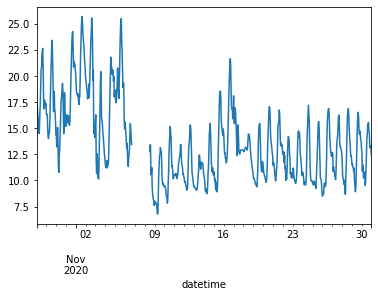

In [ ]:
series = epw_df['Dry Bulb Temperature']
series.plot()